# 1. Lines with a ticked patheffect
틱은 TickedStroke를 사용하여 한 쪽을 장애물로 표시하기 위해 선에 추가할 수 있습니다. 틱의 각도, 간격 및 길이를 제어할 수 있습니다. <br/>
<br/>

이 틱들은 범례에도 적절하게 나타납니다.

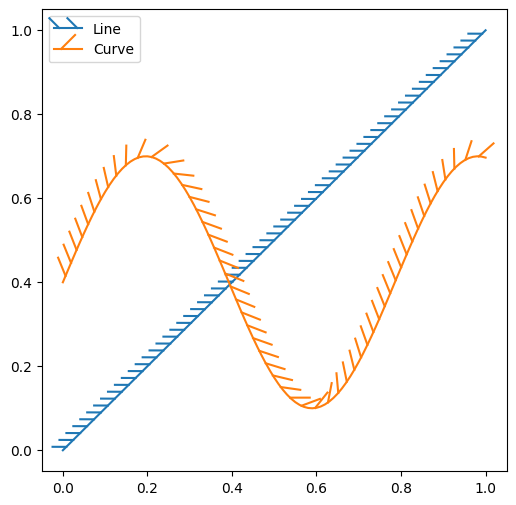

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Plot a straight diagonal line with ticked style path
fig, ax = plt.subplots(figsize = (6, 6))
ax.plot([0, 1], [0, 1], label = "Line",
        path_effects = [patheffects.withTickedStroke(spacing = 7, angle = 135)])

# Plot a curved line with ticked style path
nx = 101
x = np.linspace(0.0, 1.0, nx)
y = 0.3 * np.sin(x * 8) + 0.4
ax.plot(x, y, label = "Curve", path_effects = [patheffects.withTickedStroke()])

ax.legend()

plt.show()

**path_effects**: 이 매개변수는 경로 효과를 설정하기 위해 사용됩니다. <br/>
<br/>

**withTickedStroke(spacing = 7, angle = 135)**: 틱 스타일의 경로 효과를 생성합니다. 이 효과는 틱 간의 간격을 7로 설정하고, 각도를 135도로 설정합니다.

# 2. Linestyles
"solid", "dotted", "dashed", 또는 "dashdot" 문자열을 사용하여 간단한 선 스타일을 정의할 수 있습니다. (offset, (on_off_seq)) 형식의 대시 튜플을 제공함으로써 더 세부적인 제어도 가능합니다. <br/>
<br/>

참고: 대시 스타일은 Line2D.set_dashes를 통해 구성할 수도 있으며, property_cycle에서 키워드 dashes를 사용하여 대시 시퀀스의 리스트를 전달하는 방식으로 대시 스타일을 사용자 정의할 수도 있습니다.

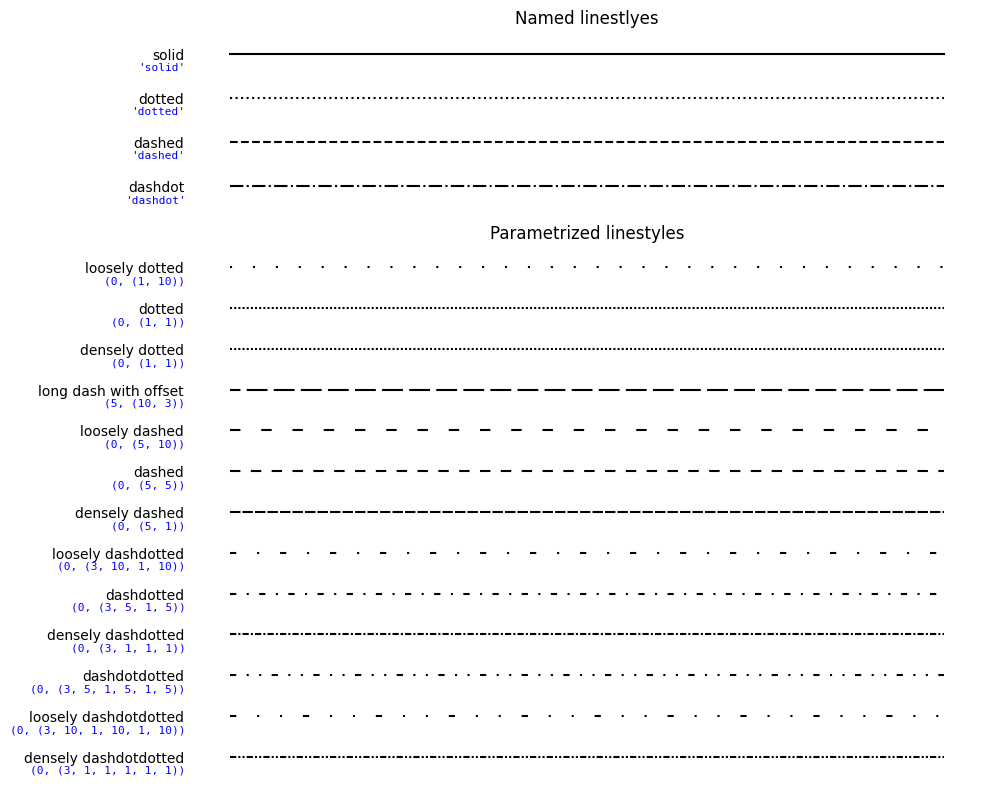

In [3]:
import numpy as np
import matplotlib.pyplot as plt

linestyle_str = [
    ('solid', 'solid'), # Same as (0, ()) or '-'
    ('dotted', 'dotted'), # Same as (0, (1, 1)) or ':'
    ('dashed', 'dashed'), # Same as '--'
    ('dashdot', 'dashdot') # Same as '-.'
]

linestyle_tuple = [
    ('loosely dotted', (0, (1, 10))),
    ('dotted', (0, (1, 1,))),
    ('densely dotted', (0, (1, 1))),
    ('long dash with offset', (5, (10, 3))),
    ('loosely dashed', (0, (5, 10))),
    ('dashed', (0, (5, 5))),
    ('densely dashed', (0, (5, 1))),

    ('loosely dashdotted', (0, (3, 10, 1, 10))),
    ('dashdotted', (0, (3, 5, 1, 5))),
    ('densely dashdotted', (0, (3, 1, 1, 1))),

    ('dashdotdotted', (0, (3, 5, 1, 5, 1, 5))),
    ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
    ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))
]

def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y + i, linestyle = linestyle, linewidth = 1.5, color = 'black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim = (-0.5, len(linestyles) - 0.5),
           yticks = np.arange(len(linestyles)),
           yticklabels = yticklabels)
    ax.tick_params(left = False, bottom = False, labelbottom = False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy = (0.0, i), xycoords = ax.get_yaxis_transform(),
                    xytext = (-6, -12), textcoords = 'offset points',
                    color = 'blue', fontsize = 8, ha = 'right', family = 'monospace')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (10, 8), height_ratios = [1, 3])

plot_linestyles(ax0, linestyle_str[::-1], title = 'Named linestlyes')
plot_linestyles(ax1, linestyle_tuple[::-1], title = 'Parametrized linestyles')

plt.tight_layout()
plt.show()